In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

%matplotlib inline

In [18]:
def batch_gradient_descent(theta, x, y, alpha=0.01, epsilon=200, print_cost=1000, plot=False):
    """
    Implements batch gradient descent using vectors and numpy.
    
    Arguments:
        theta     : (n + 1)-dimensional vector
        x         : (m, n + 1)-dimension matrix
        y         : (m, 1)-dimension vector
        epsilon   : cost function threshold
        alpha     : learning rate
        print_cost: # iterations to print cost
        
    Returns:
        theta, n_iter iterations
    """
    m = y.shape[0]
    n = theta.shape[0] - 1
    
    plot_data = []
    
    # Feature scaling
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    assert(x.shape == (m, n + 1)), 'invalid shape for x' + str(x.shape)
    assert(y.shape == (m , 1)), 'invalid shape for y' + str(y.shape)
    
    cost = epsilon + 1  # Acts as infinity
    iterations = 0
    
    while cost >= epsilon:  
        h = np.dot(x, theta)
        theta = theta - alpha / m * np.sum((h - y) * x, axis=0, keepdims=True).T
        iterations += 1
        cost = 1 / (2 * m) * np.sum((h - y) ** 2)
        
        if (iterations % print_cost == 0):
            plot_data.append([iterations, cost])
            print(cost)
    
    if plot:
        # Plot the cost function
        plot_x = [item[0] for item in plot_data]
        plot_y = [item[1] for item in plot_data]
        plt.xlabel('Iteration')
        plt.ylabel('Loss value')
        plt.title('Loss over iteration count for California housing prices data')
        plt.plot(plot_x, plot_y, 'r--')
            
    return theta, iterations

In [60]:
y = np.array([[400], [330], [369], [232], [540]], dtype=np.float64)
x = np.array([[2104,3], [1600,3], [2400,3], [1416,2], [3000,4]], dtype=np.float64)
x = np.concatenate((np.ones((5,1), dtype=np.float64), x), axis=1)
theta = np.array([[40], [30], [50]], dtype=np.float64)

In [61]:
t0, it = batch_gradient_descent(theta, x, y, alpha=0.1, print_cost=10000)

241.55022046783412
183.71510403322327
167.20977607428108
158.14127196898238
152.7062265596757


In [62]:
print(it, 'iterations taken.')

57842 iterations taken.


In [63]:
K = np.linalg.norm(t0)

In [58]:
data = load_boston()
x = data.data
y = data.target

In [59]:
y = y.reshape((506, 1))

In [60]:
x.shape

(506, 13)

In [61]:
x = np.concatenate((np.ones((506,1), dtype=np.float64), x), axis=1)

In [32]:
theta0 = np.random.randn(14, 1)

In [34]:
batch_gradient_descent(theta0, x, y, alpha=0.1, print_cost=10000)

270.38275098581613
247.7168124535086
227.6392698439217
209.834964064373
194.02823564687048
179.97790224936696
167.47287976809517
156.32836421474124
146.382502205229


(array([[318.3491618 ],
        [149.04036362],
        [422.44383821],
        [268.31780844],
        [337.23128679],
        [305.33317196],
        [332.46264176],
        [295.06371824],
        [342.83802631],
        [256.13802145],
        [285.76165778],
        [309.88177345],
        [334.83212306],
        [249.83892528]]), 90000)

In [3]:
def run_experiment(x, y, alpha=0.1, K='auto', epsilon=100, print_cost=1000000):
    """
    Runs one experiment (trial), comparing the number of iterations required to converge
    using 1/LC vs. custom alpha value.
    
    Args:
    -----
    x: (m, n + 1)-dimension matrix
    y: (m, 1)-dimension vector
    """
    m = x.shape[0]
    n = x.shape[1] - 1
    theta = np.random.randn(n + 1, 1)
    
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    theta_final, it = batch_gradient_descent(theta, x, y, alpha=alpha, epsilon=epsilon, print_cost=print_cost)
    print('Traditional:', it, 'iterations')
    
    if (K == 'auto'):
        K = np.linalg.norm(theta_final)
    print(K)
    L = K / m * np.linalg.norm(np.dot(x.T, x)) - 1 / m * np.linalg.norm(np.dot(y.T, x))
    a = np.abs(1 / L)
    print('Custom learning rate:', a)
    _, it = batch_gradient_descent(theta, x, y, alpha=a, epsilon=epsilon, print_cost=print_cost)
    print('Custom:', it, 'iterations')

In [62]:
run_experiment(x, y, K=514.5, epsilon=200)

Traditional: 46041 iterations
514.5
Custom learning rate: 8.314056750609444
Custom: 555 iterations


In [48]:
df = pd.DataFrame(x)

In [35]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
df.mean().sum()

910.961571581027

In [49]:
df.max().mean()

117.7972076923077

In [53]:
(911 + 118) / 2

514.5

## Cali housing dataset

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
data = fetch_california_housing()

In [6]:
x, y = data.data, data.target

In [7]:
y = y.reshape(y.shape[0], 1)

In [8]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [9]:
df = pd.DataFrame(x)

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,20640.0,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.0,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,0.0,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,1.0,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.0,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.0,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,1.0,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,1.0,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [11]:
df.mean().sum() + 239  # because of the -119.5

1623.6453886510424

In [12]:
df.max().mean()

4121.883243434344

In [13]:
(1622.6 + 4637) / 2

3129.8

In [10]:
run_experiment(x, y, K=3129.8, epsilon=2.8051, print_cost=10000)

2.8052376997534756
2.8051432666430762
Traditional: 24582 iterations
3129.8
Custom learning rate: 5163.501867504555
Custom: 2 iterations


2.5763599709325717
2.3734938629602347
2.1937232488345697
2.0341096495449755
1.8921202500913143
1.7655688696492489
1.6525657873574648
1.5514750730417515
1.4608782799938758
1.379543532613131
1.3063991902691212
1.2405113943584778
1.1810649117567278
1.1273467777099555
1.0787323172046235
1.0346731881403464


(array([[2870.42145455],
        [3633.4123509 ],
        [2977.66454568],
        [2970.13898714],
        [2770.37827585],
        [2727.08907474],
        [1413.60853933],
        [2850.86306406],
        [2874.30095363]]), 8431)

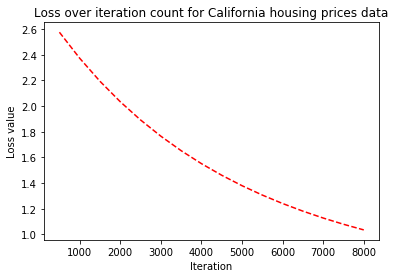

In [19]:
theta = np.random.randn(x.shape[1], 1)
batch_gradient_descent(theta, x, y, alpha=5163.5, epsilon=1, print_cost=500, plot=True)

## Energy efficiency dataset

In [71]:
df = pd.read_excel('energy_efficiency.xlsx')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [73]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [75]:
x_cols = ['X' + str(c) for c in range(1, 9)]
print(x_cols)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


In [79]:
x = np.array(df[x_cols])
y = np.array(df['Y1'])

In [80]:
y.shape

(768,)

In [81]:
y = y.reshape(y.shape[0], 1)

In [82]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [84]:
x_df = df[x_cols]

In [85]:
K = (x_df.mean().sum() + x_df.max().mean()) / 2
print(K)

681.1792708333335


In [88]:
run_experiment(x, y, K=K, print_cost=100000)

231.73779748684348
181.84652494431285
145.1382068848754
118.1125042478078
Traditional: 489592 iterations
681.1792708333335
Custom learning rate: 12.777895560537498
Custom: 3833 iterations


## Online news popularity

In [89]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [139]:
x_df = df[df.columns[1:-1]]
y_df = df[df.columns[-1]]

In [140]:
x = np.array(x_df)
y = np.array(y_df)

y = y.reshape(y.shape[0], 1)
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [141]:
x.shape

(39644, 60)

In [142]:
x = np.concatenate((np.ones((x.shape[0],1), dtype=np.float64), x), axis=1)

In [143]:
x_df = pd.DataFrame(x)
K = (x_df.mean().sum() + x_df.max().mean()) / 2
print(K)

576359.2450739361


In [145]:
run_experiment(x, y, K=K, epsilon=73355000, print_cost=1000)

73355536.3892745
73355482.662419
73355428.93606222
73355375.2102041
73355321.48484468
73355267.75998393
73355214.03562185
73355160.31175841
73355106.58839366
73355052.86552754
Traditional: 10985 iterations
576359.2450739361
Custom learning rate: 1.462188436455874
Custom: 753 iterations
